In [1]:
!pip install xgboost

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

In [2]:
# Subir archivo desde tu equipo si estás en Colab
from google.colab import files
uploaded = files.upload()

Saving Datos1 - Final.csv to Datos1 - Final.csv


In [4]:
import pandas as pd
df = pd.read_csv("Datos1 - Final.csv", encoding='latin1')
df.head()

,anio,precipitacion,produccion_agricola,energiapercapita
0,2005,15.50,527000,1.21
1,2006,14.32,531000,1.17
2,2007,17.30,535000,1.13
3,2008,64.00,539000,1.26
4,2009,18.26,543000,1.30


In [6]:
# ✅ Seleccionar características y variable objetivo
X = df[['energiapercapita']]
y = df['produccion_agricola']

# 🔀 Separar en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# 📈 Entrenar y evaluar modelos
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

def evaluar_modelo(nombre, modelo):
    modelo.fit(X_train, y_train)
    pred = modelo.predict(X_test)
    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    r2 = r2_score(y_test, pred)
    print(f"\n🔍 {nombre} ---")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}")

In [14]:
# 1. Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
modelo_gbr = GradientBoostingRegressor(random_state=42)
evaluar_modelo("Gradient Boosting", modelo_gbr)


🔍 Gradient Boosting ---
MAE: 8003.55
RMSE: 10156.32
R²: 0.8938


In [ ]:
# 2. XGBoost Regressor
modelo_xgb = xgb.XGBRegressor(random_state=42)
evaluar_modelo("XGBoost", modelo_xgb)



🔍 XGBoost ---
MAE: 8000.06
RMSE: 8485.33
R²: 0.9258


In [ ]:
#3. K-Nearest Neighbors
modelo_knn = KNeighborsRegressor(n_neighbors=3)
evaluar_modelo("KNN", modelo_knn)


🔍 KNN ---
MAE: 16000.00
RMSE: 17400.61
R²: 0.9527


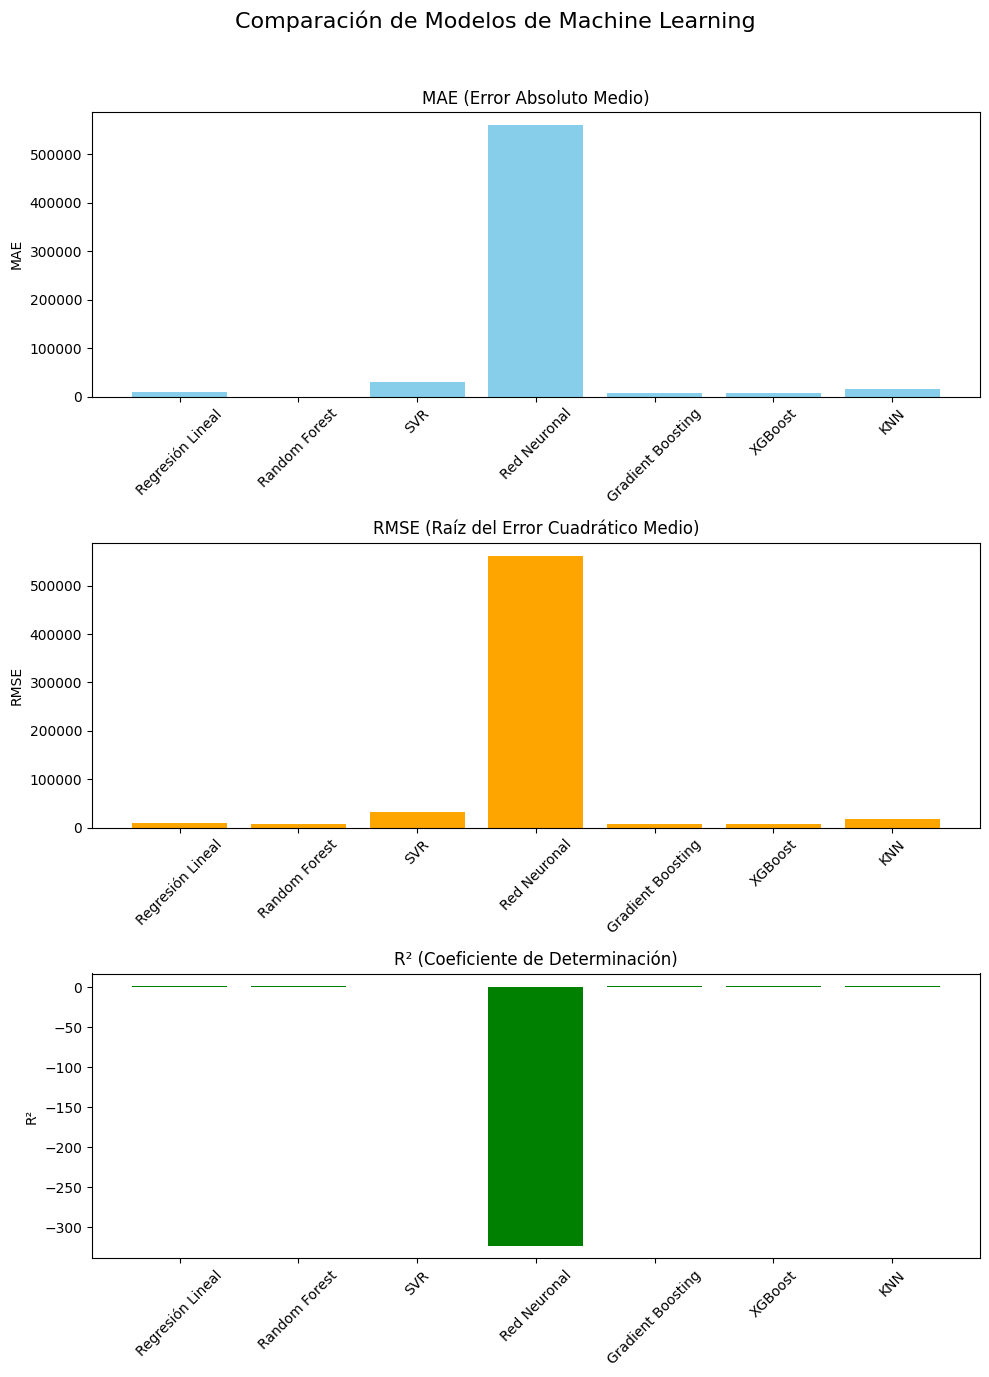

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Datos de los modelos
data = {
    'Modelo': [
        'Regresión Lineal',
        'Random Forest',
        'SVR',
        'Red Neuronal',
        'Gradient Boosting',
        'XGBoost',
        'KNN'
    ],
    'MAE': [
        8920.974,
        71,
        30995.235,
       559925.3125,
        7998.14,
        8000,
        16000.00
    ],
    'RMSE': [
        9462.146,
        7844.335,
        31554.5512,
        560792.5856,
        8482.29,
        8485.33,
        17400.61
    ],
    'R2': [
        0.90,
        0.93,
        -0.025,
        -322.88,
        0.9259,
        0.9258,
        0.9527
    ]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Crear subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 14))
fig.suptitle('Comparación de Modelos de Machine Learning', fontsize=16)

# MAE
axs[0].bar(df['Modelo'], df['MAE'], color='skyblue')
axs[0].set_title('MAE (Error Absoluto Medio)')
axs[0].set_ylabel('MAE')
axs[0].tick_params(axis='x', rotation=45)

# RMSE
axs[1].bar(df['Modelo'], df['RMSE'], color='orange')
axs[1].set_title('RMSE (Raíz del Error Cuadrático Medio)')
axs[1].set_ylabel('RMSE')
axs[1].tick_params(axis='x', rotation=45)

# R²
axs[2].bar(df['Modelo'], df['R2'], color='green')
axs[2].set_title('R² (Coeficiente de Determinación)')
axs[2].set_ylabel('R²')
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

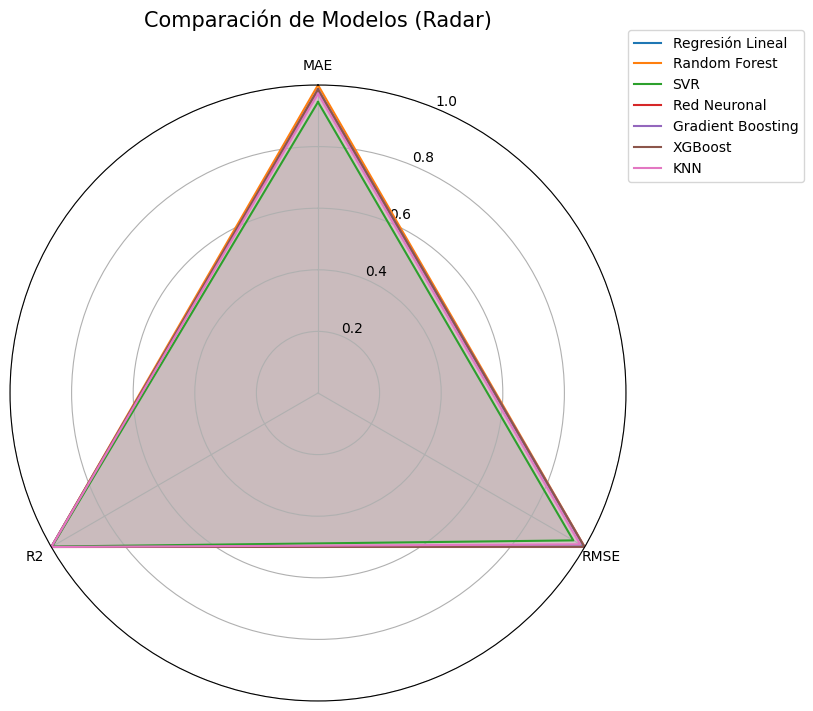

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Datos de los modelos
data = {
    'Modelo': [
        'Regresión Lineal',
        'Random Forest',
        'SVR',
        'Red Neuronal',
        'Gradient Boosting',
        'XGBoost',
        'KNN'
    ],
    'MAE': [
        8920.974,
        71,
        30995.235,
       559925.3125,
        7998.14,
        8000,
        16000.00
    ],
    'RMSE': [
        9462.146,
        7844.335,
        31554.5512,
        560792.5856,
        8482.29,
        8485.33,
        17400.61
    ],
    'R2': [
        0.90,
        0.93,
        -0.025,
        -322.88,
        0.9259,
        0.9258,
        0.9527
    ]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Normalizar MAE y RMSE para que estén en escala 0-1 (inversa porque menos error es mejor)
scaler = MinMaxScaler()
df[['MAE', 'RMSE']] = 1 - scaler.fit_transform(df[['MAE', 'RMSE']])

# Normalizar R² directamente (mayor es mejor)
df['R2'] = scaler.fit_transform(df[['R2']])

# Preparar datos para el radar
labels = ['MAE', 'RMSE', 'R2']
num_vars = len(labels)

# Ángulos del gráfico
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # cerrar el gráfico

# Inicializar figura
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
plt.title('Comparación de Modelos (Radar)', size=15, y=1.08)

# Dibujar líneas por modelo
for i, row in df.iterrows():
    values = row[labels].tolist()
    values += values[:1]  # cerrar el gráfico
    ax.plot(angles, values, label=row['Modelo'])
    ax.fill(angles, values, alpha=0.1)

# Personalizar gráfico
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_ylim(0, 1)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()